In [4]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn import svm
from skimage.feature import greycomatrix, greycoprops
from sklearn import metrics
from tqdm import tqdm

## Read Data

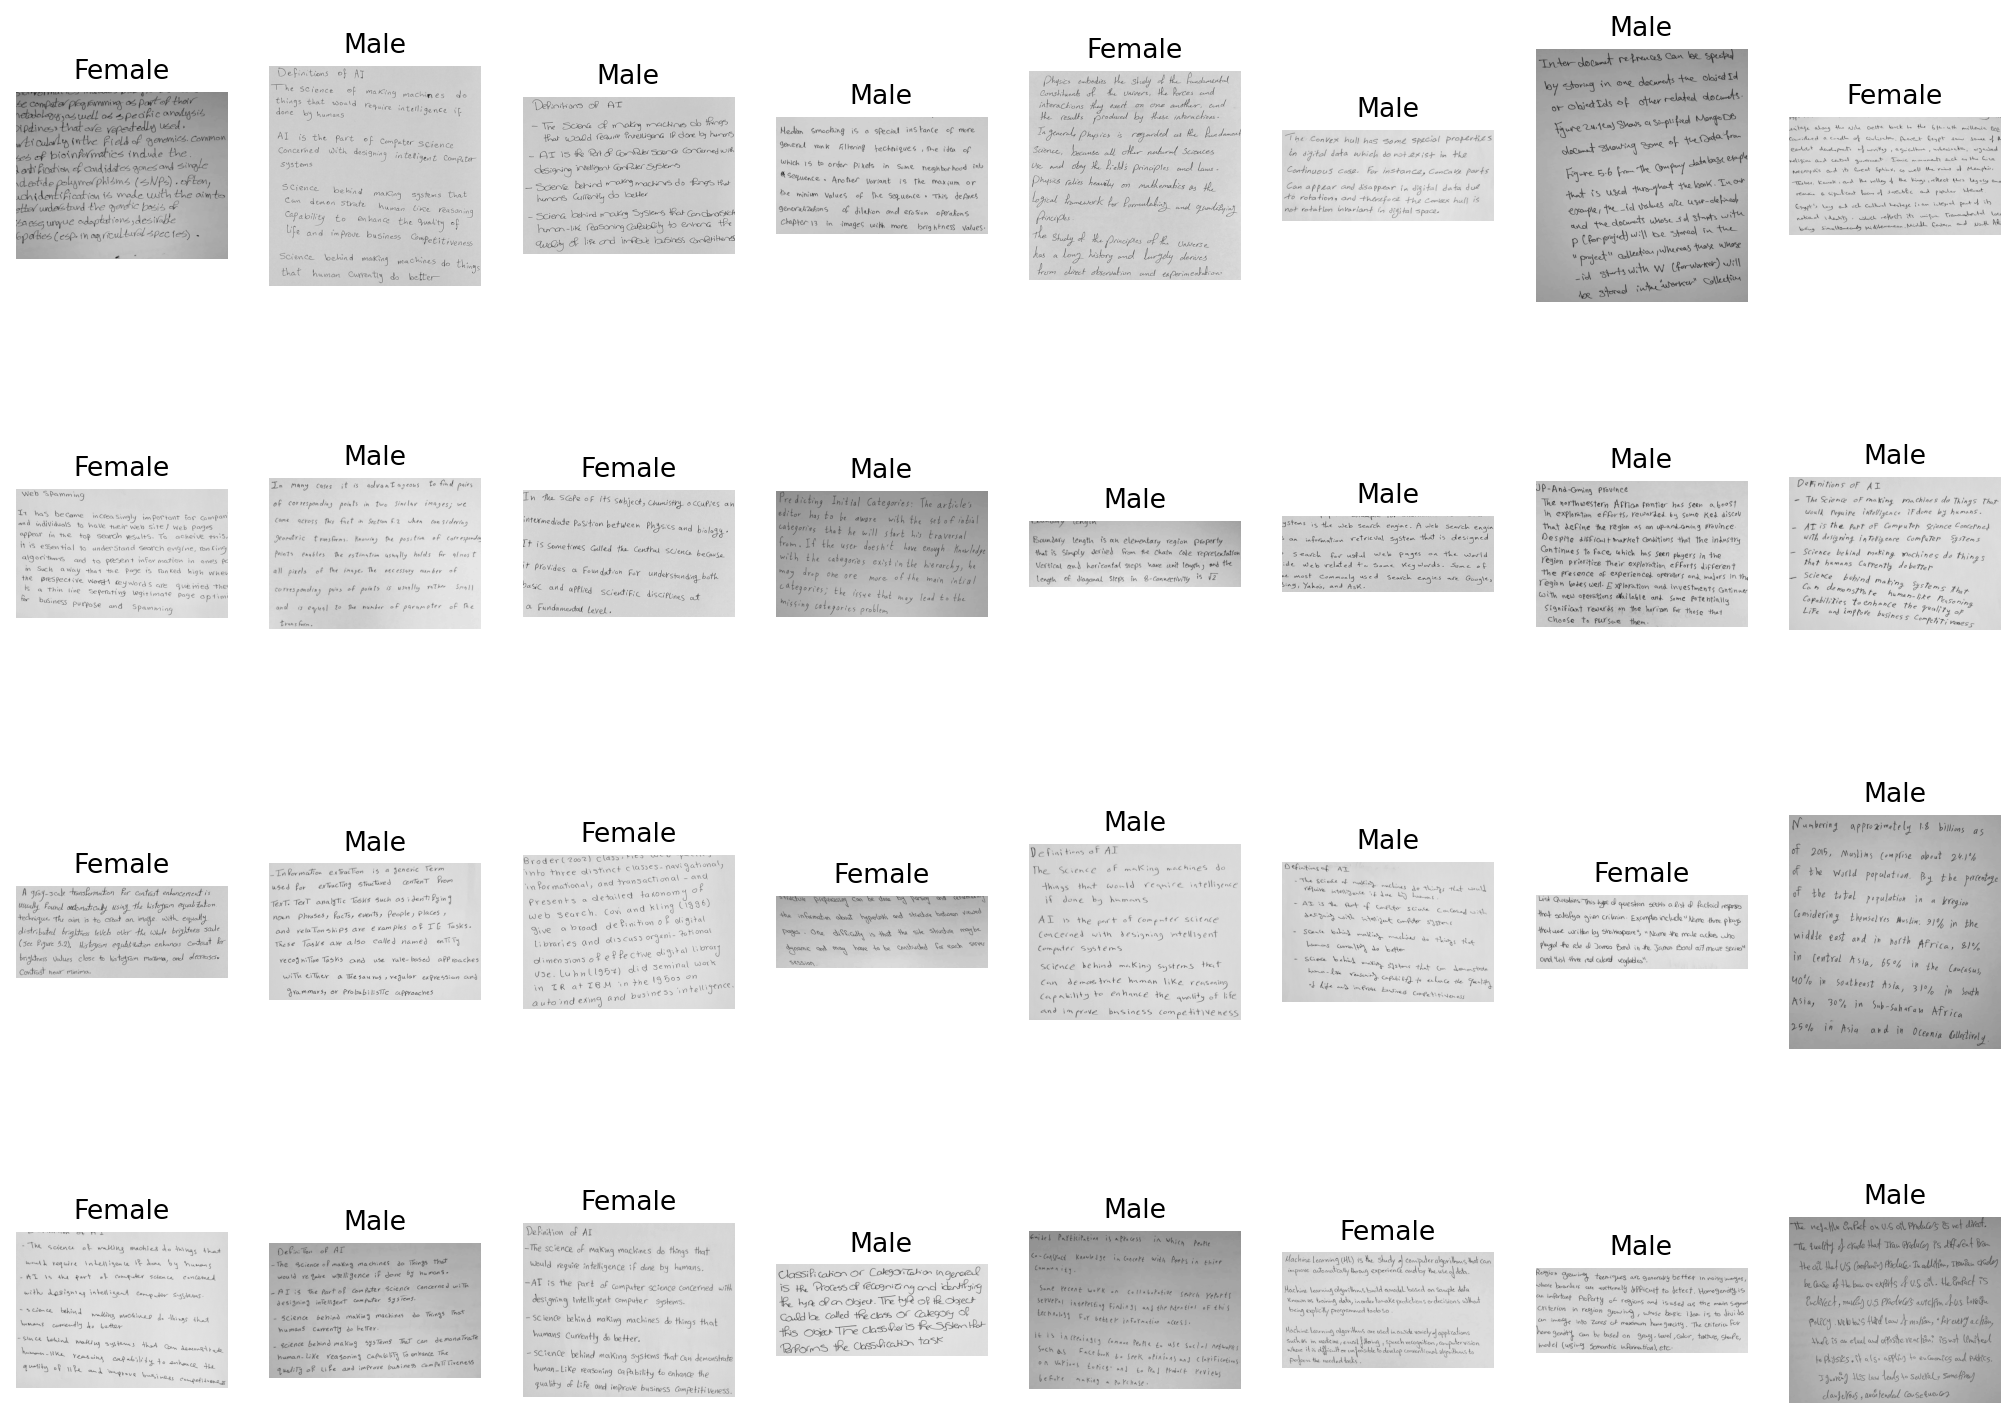

 length of training set is 272
 length of validation set is 91


In [5]:
def Read_Dataset(saved=False, plot=False, CMP_Only=False):
    if saved:
        with open('../Datasets/data_set.npy', 'rb') as f:
            x_data_cmp = np.load(f, allow_pickle=True)
            y_data_cmp = np.load(f, allow_pickle=True)
            x_data_icdar = np.load(f, allow_pickle=True)
            y_data_icdar = np.load(f, allow_pickle=True)

    else:
        x_data_cmp, y_data_cmp, x_data_icdar, y_data_icdar = [], [], [], []
        #load male images
        for filename in tqdm(sorted(glob.glob('../Datasets/CMP2023_Clipped/Male/*.png'))):
            try:
                img = cv2.imread(filename, 0)                           # 0 for gray-scale
                x_data_cmp.append(img)
                y_data_cmp.append(0)
            except:
                print("corrupted image detected.")
            

        ## load female images
        for filename in tqdm(sorted(glob.glob('../Datasets/CMP2023_Clipped/Female/*.png'))):
            try:
                img = cv2.imread(filename, 0)
                x_data_cmp.append(img)
                y_data_cmp.append(1)
            except:
                print("corrupted image detected.")

        
        for filename in tqdm(sorted(glob.glob('../Datasets/ICDAR2013_Clipped/Male/*.png'))):
            try:
                img = cv2.imread(filename, 0)                           # 0 for gray-scale
                x_data_icdar.append(img)
                y_data_icdar.append(0)
            except:
                print("corrupted image detected.")
            

        ## load female images
        for filename in tqdm(sorted(glob.glob('../Datasets/ICDAR2013_Clipped/Female/*.png'))):
            try:
                img = cv2.imread(filename, 0)
                x_data_icdar.append(img)
                y_data_icdar.append(1)
            except:
                print("corrupted image detected.")
            

        x_data_cmp,  y_data_cmp = np.array(x_data_cmp), np.array(y_data_cmp)
        x_data_icdar, y_data_icdar = np.array(x_data_icdar), np.array(y_data_icdar)


        with open('../Datasets/data_set.npy', 'wb') as f:
            np.save(f, x_data_cmp, allow_pickle=True)
            np.save(f, y_data_cmp, allow_pickle=True)
            np.save(f, x_data_icdar, allow_pickle=True)
            np.save(f, y_data_icdar, allow_pickle=True)

          

    # Shuffle both
    p = np.random.permutation(len(x_data_cmp))
    x_data_cmp = x_data_cmp[p]
    y_data_cmp = y_data_cmp[p]
    
    # Split into training and testing sets with trainging only involving CMP23.
    train_size = int(0.75 * len(x_data_cmp))

    x_test, y_test = x_data_cmp[train_size:], y_data_cmp[train_size:]

    x_train, y_train = x_data_cmp[:train_size], y_data_cmp[:train_size]
    if not CMP_Only:
        x_train, y_train = np.concatenate((x_train, x_data_icdar)), np.concatenate((y_train, y_data_icdar))
    p = np.random.permutation(len(x_train))
    x_train = x_train[p]
    y_train = y_train[p]


    if plot:
        plt.figure(figsize=(16, 12), dpi=160)

        enum = ['Male', 'Female']
        for i in range(4*8):
            ax = plt.subplot(4,8,i+1)
            ax.title.set_text(enum[y_test[i]])
            plt.axis('off')
            plt.imshow(x_test[i].squeeze(), cmap='gray')  #first 6 images in the first batch. Squeeze so 1xPxP -> PxP
        plt.show()

        print(f" length of training set is {len(x_train)}")
        print(f" length of validation set is {len(x_test)}")

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = Read_Dataset(saved=True, plot=True, CMP_Only=True)
# You should run this with saved set to false only once after cloning.